In [5]:
import pandas as pd

In [6]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [7]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [8]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [9]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [10]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max()-x.min()))

In [11]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [14]:
import tensorflow as tf

In [15]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [17]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [18]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A','B','C','D'])

In [19]:
assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)
assigned_group

_HashedCategoricalColumn(key='Group', hash_bucket_size=10, dtype=tf.string)

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

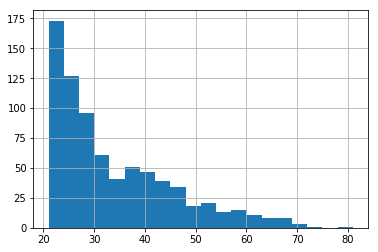

In [26]:
diabetes['Age'].hist(bins=20)

In [28]:
age_bucket = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [29]:
age_bucket

_BucketizedColumn(source_column=_NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(20, 30, 40, 50, 60, 70, 80))

In [30]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, assigned_group, age_bucket]

In [31]:
# Train test split

In [33]:
x_data = diabetes.drop('Class', axis=1)
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [34]:
labels = diabetes['Class']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.3, random_state=101)

In [38]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [39]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Dennis\\AppData\\Local\\Temp\\tmpnzuq85nb', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002008FBA8278>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [40]:
model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Dennis\AppData\Local\Temp\tmpnzuq85nb\model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 386.88
INFO:tensorflow:loss = 6.356332, step = 101 (0.260 sec)
INFO:tensorflow:global_step/sec: 789.515
INFO:tensorflow:loss = 5.2836084, step = 201 (0.127 sec)
INFO:tensorflow:global_step/sec: 737.26
INFO:tensorflow:loss = 5.551859, step = 301 (0.135 sec)
INFO:tensorflow:global_step/sec: 731.88
INFO:tensorflow:loss = 4.1128016, step = 401 (0.137 sec)
INFO:tensorflow:global_step/sec: 789.506
INFO:tensorflow:loss = 4.7831078, step = 501 (0.127 sec)
INFO:tensorflow:global_step/sec: 788.903
INFO:tensorflow:loss = 6.7741776, step = 601 (0.127 sec)
INFO:tensorflow:global_step/sec: 

In [41]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [42]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-07-03:34:48
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Dennis\AppData\Local\Temp\tmpnzuq85nb\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-06-07-03:34:49
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7316017, accuracy_baseline = 0.64935064, auc = 0.80740744, auc_precision_recall = 0.65295845, average_loss = 0.52262956, global_step = 1000, label/mean = 0.35064936, loss = 5.0303097, precision = 0.6507937, prediction/mean = 0.3662567, recall = 0.50617284


In [43]:
results

{'accuracy': 0.7316017,
 'accuracy_baseline': 0.64935064,
 'auc': 0.80740744,
 'auc_precision_recall': 0.65295845,
 'average_loss': 0.52262956,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.0303097,
 'precision': 0.6507937,
 'prediction/mean': 0.3662567,
 'recall': 0.50617284}

In [44]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=10, num_epochs=1, shuffle=False)

In [45]:
predictions = model.predict(pred_input_func)

In [47]:
my_pred = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Dennis\AppData\Local\Temp\tmpnzuq85nb\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [48]:
my_pred

[{'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.49638638], dtype=float32),
  'logits': array([-0.01445472], dtype=float32),
  'probabilities': array([0.50361365, 0.4963864 ], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.6244329], dtype=float32),
  'logits': array([0.5084069], dtype=float32),
  'probabilities': array([0.37556705, 0.6244329 ], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.3523027], dtype=float32),
  'logits': array([-0.6089327], dtype=float32),
  'probabilities': array([0.64769727, 0.3523027 ], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.35245982], dtype=float32),
  'logits': array([-0.6082442], dtype=float32),
  'probabilities': array([0.64754015, 0.35245982], dtype=float32)},
 {'class_i

In [50]:
# dense neural network classifier
dnn_model =tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Dennis\\AppData\\Local\\Temp\\tmpj59nn5dh', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020092B9BCC0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [51]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [56]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, embedded_group_col, age_bucket]

In [57]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train, y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [58]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Dennis\\AppData\\Local\\Temp\\tmp5nv1oz9j', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002008FE66630>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [59]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Dennis\AppData\Local\Temp\tmp5nv1oz9j\model.ckpt.
INFO:tensorflow:loss = 6.207384, step = 1
INFO:tensorflow:global_step/sec: 469.241
INFO:tensorflow:loss = 5.767208, step = 101 (0.215 sec)
INFO:tensorflow:global_step/sec: 828.639
INFO:tensorflow:loss = 4.7872744, step = 201 (0.122 sec)
INFO:tensorflow:global_step/sec: 789.513
INFO:tensorflow:loss = 3.0870638, step = 301 (0.125 sec)
INFO:tensorflow:global_step/sec: 808.79
INFO:tensorflow:loss = 6.0708857, step = 401 (0.125 sec)
INFO:tensorflow:global_step/sec: 771.232
INFO:tensorflow:loss = 3.3676858, step = 501 (0.130 sec)
INFO:tensorflow:global_step/sec: 856.881
INFO:tensorflow:loss = 4.703823, step = 601 (0.119 sec)
INFO:tensorflow:global_step/sec

In [60]:
eval_input_fn = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [61]:
dnn_model.evaluate(eval_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-07-03:49:00
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Dennis\AppData\Local\Temp\tmp5nv1oz9j\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-06-07-03:49:01
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.76623374, accuracy_baseline = 0.64935064, auc = 0.82835394, auc_precision_recall = 0.70714104, average_loss = 0.49178976, global_step = 1000, label/mean = 0.35064936, loss = 4.733476, precision = 0.70149255, prediction/mean = 0.31105396, recall = 0.5802469


{'accuracy': 0.76623374,
 'accuracy_baseline': 0.64935064,
 'auc': 0.82835394,
 'auc_precision_recall': 0.70714104,
 'average_loss': 0.49178976,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.733476,
 'precision': 0.70149255,
 'prediction/mean': 0.31105396,
 'recall': 0.5802469}